##Importing the libraries

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
import seaborn as sns
import pandas as pd

##Preparing the dataset

In [3]:
X,Y = load_breast_cancer(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

print(X.shape)
print(Y.shape)

ss = preprocessing.StandardScaler()

ss.fit(X_train) # normalizing the features
X_train_scaled = ss.transform(X_train) # normalizing the features
X_test_scaled = ss.transform(X_test) # normalizing the features


# X_train_scaled = preprocessing.StandardScaler().fit(X_train)
# X_train.transform(X_train)
# X_test_scaled = preprocessing.StandardScaler().transform(X_test)


print(X_train.shape)
print(X_test.shape)

(569, 30)
(569,)
(455, 30)
(114, 30)


##Training the classifier

In [4]:
clf = LogisticRegression(random_state = 5, max_iter = 500, solver = 'liblinear').fit(X_train_scaled,Y_train)


##Inference

In [5]:
Y_hat = clf.predict(X_test_scaled)
Y_score = clf.decision_function(X_test_scaled)

# print(clf.score(X_test_scaled, Y_test))

## Plotting the Area under ROC

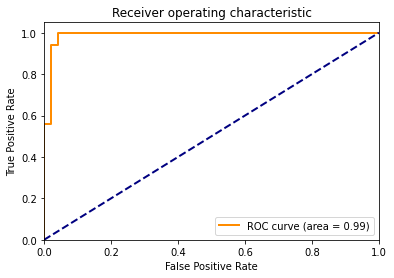

In [6]:
def plot_auroc(Y_test, Y_hat):
  fpr, tpr, threshold = roc_curve(Y_test, Y_score)

  roc_auc = auc(fpr, tpr)
  # print(fpr, tpr, threshold)

  plt.figure()
  lw = 2
  plt.plot(
      fpr,
      tpr,
      color="darkorange",
      lw=lw,
      label="ROC curve (area = %0.2f)" % roc_auc,
  )
  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic")
  plt.legend(loc="lower right")
  plt.show()


plot_auroc(Y_test, Y_hat)

##Plotting the confusion matrix

Classification Report : 
              precision    recall  f1-score   support

   Malignant       0.98      0.96      0.97        48
      Benign       0.97      0.98      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



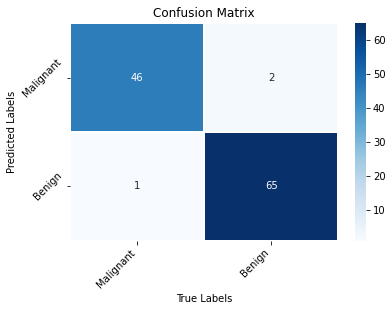

In [7]:
# conf_mat = confusion_matrix(Y_test, Y_hat)
# print(conf_mat)


print("Classification Report : \n{}".format(classification_report(Y_test, Y_hat,\
                                                                target_names = ['Malignant', 'Benign'])))

def plot_confusion_matrix(y_test, y_hat):
  cm = confusion_matrix(y_test, y_hat)
  ax = plt.subplot()
  sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Blues', linewidth=1)
  ax.set_xlabel('True Labels')
  ax.set_ylabel('Predicted Labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['Malignant', 'Benign'], rotation=45, horizontalalignment='right')
  ax.yaxis.set_ticklabels(['Malignant', 'Benign'], rotation=45, horizontalalignment='right')


plot_confusion_matrix(Y_test, Y_hat)
